<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
company=pd.read_csv ('/datasets/project_sql_result_01.csv')
location=pd.read_csv ('/datasets/project_sql_result_04.csv')
weather_conditions=pd.read_csv('/datasets/project_sql_result_07.csv')

In [3]:
# Conversión segura si es necesario
company['trips_amount'] = pd.to_numeric(company['trips_amount'], errors='coerce')
location['average_trips'] = pd.to_numeric(location['average_trips'], errors='coerce')

# Convertir fecha en dataset de clima
weather_conditions['start_ts'] = pd.to_datetime(weather_conditions['start_ts'], errors='coerce')


In [4]:
#Información general de company
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
print(company.head(11))

                         company_name  trips_amount
0                           Flash Cab         19558
1           Taxi Affiliation Services         11422
2                   Medallion Leasing         10367
3                          Yellow Cab          9888
4     Taxi Affiliation Service Yellow          9299
5           Chicago Carriage Cab Corp          9181
6                        City Service          8448
7                            Sun Taxi          7701
8           Star North Management LLC          7455
9   Blue Ribbon Taxi Association Inc.          5953
10            Choice Taxi Association          5015


In [6]:
#Información general de location
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
# Ver las primeras filas de dataset location
print(location.head(11))

   dropoff_location_name  average_trips
0                   Loop   10727.466667
1            River North    9523.666667
2          Streeterville    6664.666667
3              West Loop    5163.666667
4                 O'Hare    2546.900000
5              Lake View    2420.966667
6             Grant Park    2068.533333
7          Museum Campus    1510.000000
8             Gold Coast    1364.233333
9     Sheffield & DePaul    1259.766667
10          Lincoln Park    1246.533333


In [8]:
print(location.value_counts('dropoff_location_name'))

dropoff_location_name
Albany Park     1
North Center    1
River North     1
Pullman         1
Portage Park    1
               ..
Gage Park       1
Fuller Park     1
Englewood       1
Edison Park     1
Wrigleyville    1
Length: 94, dtype: int64


In [9]:
top_10_barrios = location.sort_values(by='average_trips', ascending= False).head(10)
print(top_10_barrios)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


In [10]:
top_10_barrios = location.sort_values(by='average_trips').tail(10)
print(top_10_barrios)

  dropoff_location_name  average_trips
9    Sheffield & DePaul    1259.766667
8            Gold Coast    1364.233333
7         Museum Campus    1510.000000
6            Grant Park    2068.533333
5             Lake View    2420.966667
4                O'Hare    2546.900000
3             West Loop    5163.666667
2         Streeterville    6664.666667
1           River North    9523.666667
0                  Loop   10727.466667


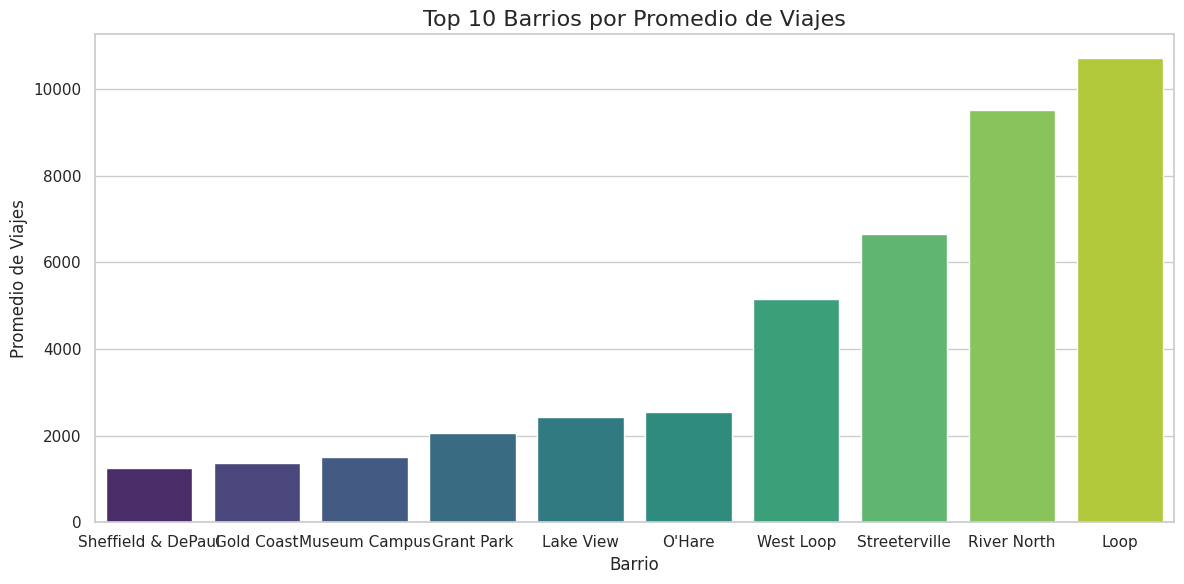

In [11]:
# Establecer estilo visual
sns.set(style="whitegrid")

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))  # Tamaño del gráfico
sns.barplot(
    data=top_10_barrios,
    x='dropoff_location_name',        # Eje X: promedio de viajes
    y='average_trips',         # Eje Y: nombre del barrio
    palette='viridis'         # Paleta de colores (puedes cambiarla)
)

# Añadir títulos y etiquetas
plt.title('Top 10 Barrios por Promedio de Viajes', fontsize=16)
plt.xlabel('Barrio', fontsize=12)
plt.ylabel('Promedio de Viajes', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de crear una grafica que nos muestra los lugares más frecuentados
</div>

<div class="alert alert-block alert-warning"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Recomendaría mostrar la información de las compañías de taxis de la misma manera que los lugares más frecuentados
</div>

In [12]:
#Información general de weather_conditions(clima)
weather_conditions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [13]:
# Ver las primeras filas de dataset weather_conditions(clima)
print(weather_conditions.head(11))

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
5  2017-11-11 04:00:00               Good            1320.0
6  2017-11-04 16:00:00                Bad            2969.0
7  2017-11-18 11:00:00               Good            2280.0
8  2017-11-11 14:00:00               Good            2460.0
9  2017-11-11 12:00:00               Good            2040.0
10 2017-11-18 06:00:00               Good            1500.0


In [14]:
#hiopotesis nula:duracion promemedio no cambia apesar del clima
#hiopotesis nula:duracion promemedio si cambia apesar del clima

In [15]:
#muestras a evaluar
duracion_lluvia=weather_conditions.query("weather_conditions == 'Bad'")['duration_seconds']
duracion_sol=weather_conditions.query("weather_conditions == 'Good'")['duration_seconds']


In [18]:
#hacerprueba de hipotesis

results=stats.ttest_ind(duracion_lluvia,duracion_sol)

#print(pvalue)
print(results.pvalue)

print('p-value: ', results.pvalue)
alpha= 0.05

if (results.pvalue < alpha):
        print("Rechazamos la hipótesis nula")
else:
        print("No podemos rechazar la hipótesis nula")

6.517970327099473e-12
p-value:  6.517970327099473e-12
Rechazamos la hipótesis nula


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Bien hecho!<br/>

Es correcto rechazar la hipotesis nula, debido a que sí hay notables cambios entre un día de buenas condiciones y uno con malas condiciones
</div>

<div class="alert alert-block alert-warning"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Cuidado!<br/>

Había un error en el código: se estaba utilizando `print(pvalue)` para imprimir el valor, lo cual es incorrecto ya que no se definió una variable de esta manera, lo que se debe hacer (que lo hiciste de buena manera en la parte del if) es lo siguiente `print(results.pvalue)`
</div>

la duracion promedio si se ve afectada por el clima

# Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, los procedimientos realizados son correctos, este es un ejercicio que nos ayuda a entender y comprobar las hipotesis con procesos estadisticos.<br/>    
<br/>    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>



<div class="alert alert-block alert-warning">
<b>Aspectos que pueden mejorar del proyecto</b> <a class="tocSkip"></a><br />

- Se pueden incluir más graficas para resaltar las observaciones o datos que muestras
- Expandir un poco más (o agregar) observaciones intermedias, saber explicar con palabras nuestros hallazgos forma parte importante del análisis de los datos    
- Mejorar un poco la limpieza del código, debemos asegurarnos antes de enviar el proyecto que todo funcione de inicio a fin, una manera de comprobar esto es reiniciando el kernel y correr el proyecto, no deberíamos encontrar ningún error
- Desarrollar un poco más las conclusiones finales, puedes añadir lo que te pareció complicado del proyecto, que mejoras se pueden hacer, etc.
    
</div>

